# quartic-data-v3

In [7]:
import sys, os
print(sys.version)
os.path.dirname(sys.executable)

3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]


'/home/bart/miniconda3/bin'

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['font.size'] = 16

Import gap data (from DiagHam) and join with band geometry data (from BandGeometry.m)


In [18]:
# t2_gap
gap_path = "~/DiagHam_Stability/trunk/FTI/src/Programs/FCI/quartic-bosons/"
gap_df = pd.read_csv(gap_path+"outfile-boson-new.csv", usecols=['UCarea','t2','gap'])
# gap_path = "~/DiagHam_Stability/trunk/tutorials/02_gap_trace/t2_gap/"
# gap_df = pd.read_csv(gap_path+"outfile.csv", usecols=['UCarea','t2','gap'])

# t2_trace
# trace_path = "~/DiagHam_Stability/trunk/quartic/June 2018/Many-body code/"
# trace_df = pd.read_csv(trace_path+"quartic-boson-geometry.csv")
trace_path = "~/DiagHam_Stability/trunk/tutorials/02_gap_trace/t2_trace/"
trace_df = pd.read_csv(trace_path+"geometry.csv")

full_df = pd.merge(gap_df,trace_df,on=['UCarea','t2'])

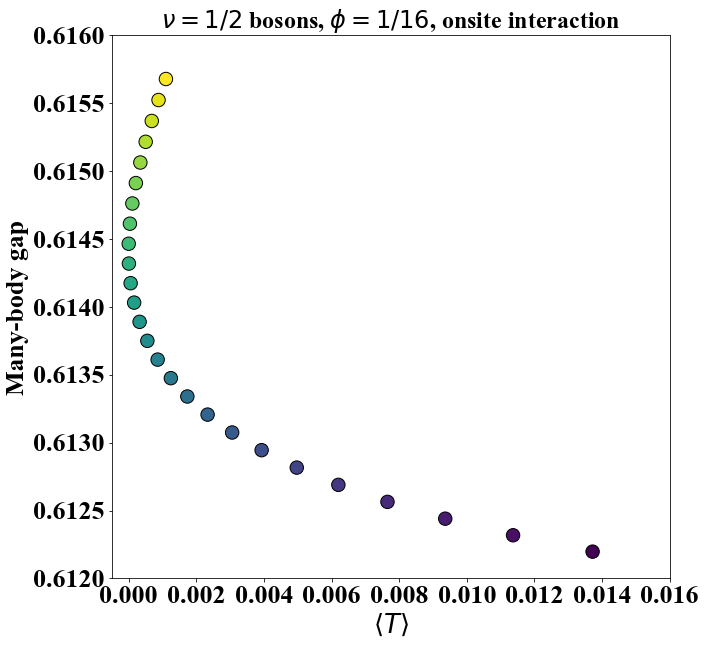

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(full_df.loc[full_df['UCarea']==16]['traceIneq'],
            full_df.loc[full_df['UCarea']==16]['gap'],
            c=full_df.loc[full_df['UCarea']==16]['t2'],
            cmap=plt.cm.viridis, edgecolor='black', s=180)
#cbar=plt.colorbar()
#cbar.ax.set_title("t2")
plt.xlabel(r"$\langle T \rangle$",fontsize=26)
plt.xticks(fontsize=26)
plt.ylabel("Many-body gap",fontsize=26)
plt.yticks(fontsize=26)
plt.title(r"$\nu=1/2$ bosons, $\phi=1/16$, onsite interaction",fontsize=24)
plt.xlim(-0.0005,0.016)
plt.ylim(0.612,0.616)
plt.savefig("bosons_16_onsite.pdf", pad_inches=0, bbox_inches='tight')